In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers

In [3]:
#read the train dataset, then split the features and labels
train_set = pd.read_csv("C:/Users/Admin/Downloads/fashion-mnist_train.csv")
x_train = train_set.iloc[:,1:]
y_train = train_set.iloc[:,0]
print(x_train.head(5))
print(y_train.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       5       0   
3       0       0       0       1       2       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0        30        43         0   
3        0  ...         3         0         0         0         0         1   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0       

In [4]:
#read the test dataset, then split the features and labels
test_set = pd.read_csv("C:/Users/Admin/Downloads/fashion-mnist_train.csv")
x_test = test_set.iloc[:,1:]
y_test = test_set.iloc[:,:1]
print(x_test.head(5))
print(y_test.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       5       0   
3       0       0       0       1       2       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0        30        43         0   
3        0  ...         3         0         0         0         0         1   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0       

C:\Users\Admin\AppData\Local\Temp\ipykernel_10532\831591842.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar.set_xticklabels(labels, rotation = 45)


[Text(0, 0, 'T-shirt/top'),
 Text(1, 0, 'Trouser'),
 Text(2, 0, 'Pullover'),
 Text(3, 0, 'Dress'),
 Text(4, 0, 'Coat'),
 Text(5, 0, 'Sandal'),
 Text(6, 0, 'Shirt'),
 Text(7, 0, 'Sneaker'),
 Text(8, 0, 'Bag'),
 Text(9, 0, 'Ankle boot')]

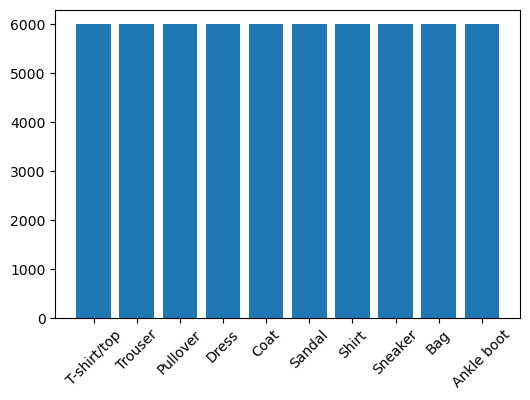

In [5]:
#Visualize the classes
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
uni = np.unique(np.array(y_test), return_counts=True)
fig = plt.figure(figsize = (6,4))
bar = fig.add_subplot(111)
bar.bar(labels,uni[1])
bar.set_xticklabels(labels, rotation = 45)

In [6]:
# SVM
#train support vector machine model, and print it accuracy
model = svm.SVC()

model.fit(x_train,y_train)

acc = model.score(x_test,y_test)
print('Model Accuracy: ',acc)

Model Accuracy:  0.91105


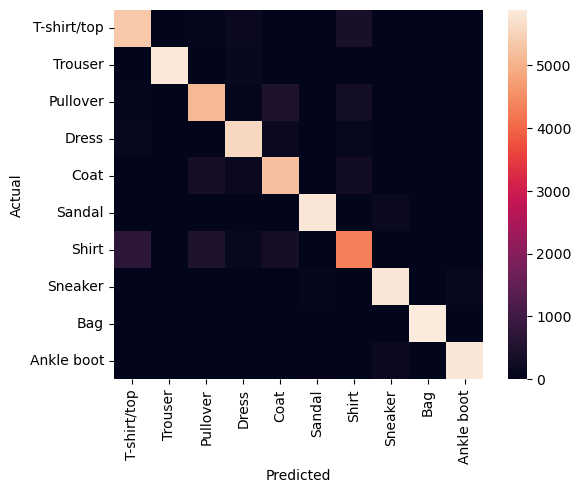

In [7]:
#confusion matrix of svm model on test set
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, labels, labels)
sns.heatmap(df_cm, square = True)
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.show()

In [8]:
# Convolutional Neural Network
#Encoding the values of y for cnn model 
y_train1 = np.array(y_train).reshape(-1,1)
y_test1 = np.array(y_test).reshape(-1,1)
enc = OneHotEncoder()  
enc.fit(y_train1)
y_train1 = enc.transform(y_train1).toarray()
y_test1 = enc.transform(y_test1).toarray()
y_train1.shape

(60000, 10)

In [9]:
#reshape features
X_train=np.array(x_train).reshape(x_train.shape[0],28,28,1)

X_test=np.array(x_test).reshape(x_test.shape[0],28,28,1)

In [10]:
#Create convolutional neural network, cnn
model = Sequential()
model.add(layers.Conv2D(64, kernel_size=3, activation='relu',input_shape=X_train.shape[1:]))
model.add(layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train1, validation_split=0.33, epochs=10,batch_size=10)

Epoch 1/10
4020/4020 [==============================] - 120s 30ms/step - loss: 0.6221 - accuracy: 0.8279 - val_loss: 0.4351 - val_accuracy: 0.8444
Epoch 2/10
4020/4020 [==============================] - 142s 35ms/step - loss: 0.3536 - accuracy: 0.8728 - val_loss: 0.3782 - val_accuracy: 0.8678
Epoch 3/10
4020/4020 [==============================] - 161s 40ms/step - loss: 0.2916 - accuracy: 0.8943 - val_loss: 0.3802 - val_accuracy: 0.8715
Epoch 4/10
4020/4020 [==============================] - 176s 44ms/step - loss: 0.2443 - accuracy: 0.9098 - val_loss: 0.4063 - val_accuracy: 0.8738
Epoch 5/10
4020/4020 [==============================] - 167s 42ms/step - loss: 0.2124 - accuracy: 0.9234 - val_loss: 0.4744 - val_accuracy: 0.8581
Epoch 6/10
4020/4020 [==============================] - 167s 42ms/step - loss: 0.1851 - accuracy: 0.9329 - val_loss: 0.4588 - val_accuracy: 0.8729
Epoch 7/10
4020/4020 [==============================] - 148s 37ms/step - loss: 0.1774 - accuracy: 0.9380 - val_loss: 0

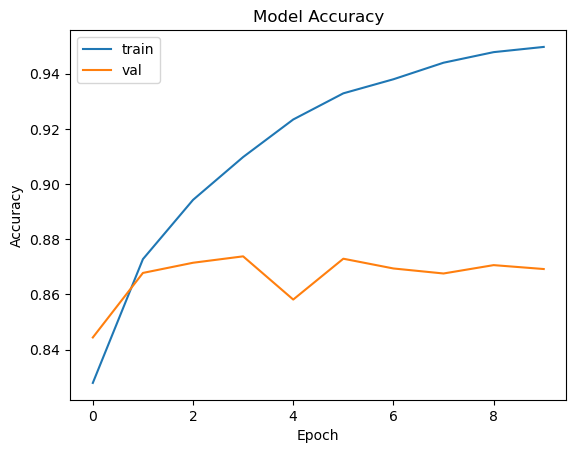

In [11]:
#Plot train and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
#loss and accuracy of the cnn model on test set
model.evaluate(X_test, y_test1)

1875/1875 [==============================] - 45s 24ms/step - loss: 0.2995 - accuracy: 0.9331


[0.2995166778564453, 0.9330833554267883]

1875/1875 [==============================] - 44s 23ms/step


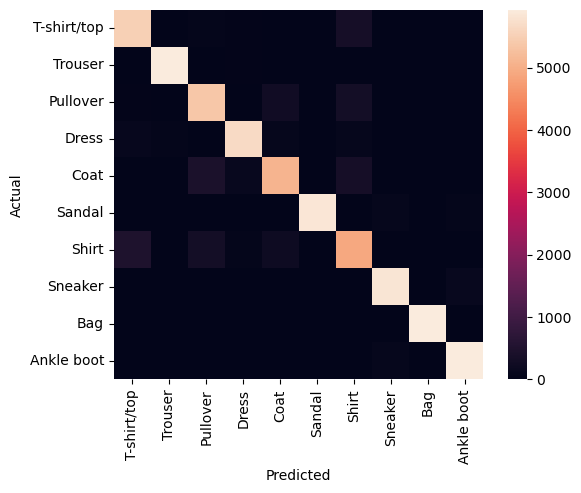

In [13]:
#Prediction and Decode the results
y_pred = model.predict(X_test)
y_pred2 = np.zeros((y_pred.shape[0],1))
for i in range(y_pred.shape[0]):
    y_pred2[i] = y_pred[i].argmax()
    
#Confusion matrix of cnn model on test set
cm = confusion_matrix(y_test,y_pred2)
df_cm = pd.DataFrame(cm, labels, labels)
sns.heatmap(df_cm, square = True)
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.show()